In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
# Q: Import and store the data in a data frame.
col_specs = [[0,3],[4,7],[10,17],[19,23],[25,33],[35,37],[39,45],[47,54],[56,58],[60,66],[68,75]]
col_names = ['City1','City2','Average Fare','Distance','Average weekly passengers','market leading airline','market share','Average fare','Low price airline','market Share','price']

us_transport = pd.read_fwf('http://www.stat.ufl.edu/~winner/data/airq402.dat', colspecs = col_specs, names = col_names,header = None)
us_transport.head()
# us_transport.shape()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market Share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [17]:
us_transport.head()
us_transport.shape

(1000, 11)

In [21]:
#Q:  Remove the outliers from the data
print(us_transport.shape)

numeric_cols = us_transport.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    sorted_col = us_transport.sort_values([col])
    q1, q3= np.percentile(sorted_col[col],[25,75])
    print(q1,q3)
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    us_transport = us_transport.loc[(us_transport[col] > lower_bound) & (us_transport[col] < upper_bound)]

print(us_transport.shape)


(1000, 11)
125.975 197.39249999999998
550.0 1399.0
256.95 768.04
46.7275 74.4725
126.165 202.805
13.06 52.98
115.84 167.81
(877, 11)


In [24]:
# Q: Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. 
us_transport.head()

X = pd.DataFrame()
Y = pd.DataFrame()

for column in us_transport.columns:
    if column != 'Average Fare':
        X[column] = us_transport[column]
    else:
        Y[column] = us_transport[column]
print(X.head())
print("!!!!")
print(Y.head())
# X and Y again taken below after dropping columns with corelation < 0.1

  City1 City2  Distance  Average weekly passengers market leading airline  \
0   CAK   ATL       528                     424.56                     FL   
1   CAK   MCO       860                     276.84                     FL   
2   ALB   ATL       852                     215.76                     DL   
3   ALB   BWI       288                     606.84                     WN   
4   ALB   ORD       723                     313.04                     UA   

   market share  Average fare Low price airline  market Share   price  
0         70.19        111.03                FL         70.19  111.03  
1         75.10        123.09                DL         17.23  118.94  
2         78.89        223.98                CO          2.77  167.12  
3         96.97         68.86                WN         96.97   68.86  
4         39.79        161.36                WN         15.34  145.42  
!!!!
   Average Fare
0        114.47
1        122.47
2        214.42
3         69.40
4        158.13


In [42]:
# Q: Drop the independent variables which has less than 0.1 correlation with the dependent variable 
test_cat = pd.get_dummies(us_transport['City1'])
print(test_cat.columns)
df_new = pd.concat([us_transport, test_cat], axis=1)
df_new.drop(['Distance','Average weekly passengers', 'market share','price', 'Average fare','market Share'], axis = 1, inplace = True )
df_new.corr()
# It can be observed that all cities in City 1 have corr < 0.1 with average fare for city 1 can be dropped





Index(['ABQ', 'ACY', 'ALB', 'AMA', 'ATL', 'AUS', 'BDL', 'BHM', 'BNA', 'BOI',
       'BOS', 'BTV', 'BUF', 'BUR', 'BWI', 'CAE', 'CAK', 'CHS', 'CLE', 'CLT',
       'CMH', 'COS', 'CRP', 'CVG', 'DAY', 'DEN', 'DFW', 'DSM', 'DTW', 'ELP',
       'EUG', 'FLL', 'FNT', 'GPT', 'GRR', 'GSO', 'GSP', 'HRL', 'IAD', 'IAH',
       'IND', 'ISP', 'JAX', 'LAS', 'LAX', 'LGA', 'LGB', 'LIT', 'MCI', 'MCO',
       'MDT', 'MEM', 'MHT', 'MIA', 'MKE', 'MSN', 'MSP', 'MSY', 'MYR', 'OAK',
       'OKC', 'OMA', 'ONT', 'ORD', 'ORF', 'PDX', 'PHF', 'PHL', 'PHX', 'PIT',
       'PSP', 'PVD', 'RDU', 'RNO', 'ROC', 'RSW', 'SAN', 'SAT', 'SDF', 'SEA',
       'SFO', 'SJC', 'SLC', 'SMF', 'SNA', 'STL', 'SYR', 'TLH', 'TPA', 'TYS'],
      dtype='object')


,Average Fare,ABQ,ACY,ALB,AMA,ATL,AUS,BDL,BHM,BNA,...,SFO,SJC,SLC,SMF,SNA,STL,SYR,TLH,TPA,TYS
Average Fare,1.000000,-0.007532,-0.048221,-0.023080,-0.061897,0.026517,-0.016612,0.011512,-0.043032,-0.017912,...,0.026214,-0.034511,-0.068782,-0.052328,-0.002483,0.039924,-0.016519,-0.053911,-0.042776,0.028340
ABQ,-0.007532,1.000000,-0.009799,-0.013889,-0.006921,-0.037444,-0.021541,-0.018437,-0.013889,-0.016315,...,-0.006921,-0.006921,-0.012015,-0.010961,-0.004891,-0.014740,-0.004891,-0.004891,-0.006921,-0.004891
ACY,-0.048221,-0.009799,1.000000,-0.006495,-0.003236,-0.017509,-0.010073,-0.008621,-0.006495,-0.007629,...,-0.003236,-0.003236,-0.005618,-0.005126,-0.002287,-0.006893,-0.002287,-0.002287,-0.003236,-0.002287
ALB,-0.023080,-0.013889,-0.006495,1.000000,-0.004587,-0.024819,-0.014278,-0.012221,-0.009206,-0.010814,...,-0.004587,-0.004587,-0.007963,-0.007265,-0.003242,-0.009770,-0.003242,-0.003242,-0.004587,-0.003242
AMA,-0.061897,-0.006921,-0.003236,-0.004587,1.000000,-0.012367,-0.007114,-0.006089,-0.004587,-0.005388,...,-0.002286,-0.002286,-0.003968,-0.003620,-0.001615,-0.004868,-0.001615,-0.001615,-0.002286,-0.001615
ATL,0.026517,-0.037444,-0.017509,-0.024819,-0.012367,1.000000,-0.038493,-0.032946,-0.024819,-0.029153,...,-0.012367,-0.012367,-0.021469,-0.019587,-0.008740,-0.026339,-0.008740,-0.008740,-0.012367,-0.008740
AUS,-0.016612,-0.021541,-0.010073,-0.014278,-0.007114,-0.038493,1.000000,-0.018954,-0.014278,-0.016771,...,-0.007114,-0.007114,-0.012351,-0.011268,-0.005028,-0.015153,-0.005028,-0.005028,-0.007114,-0.005028
BDL,0.011512,-0.018437,-0.008621,-0.012221,-0.006089,-0.032946,-0.018954,1.000000,-0.012221,-0.014355,...,-0.006089,-0.006089,-0.010571,-0.009645,-0.004303,-0.012969,-0.004303,-0.004303,-0.006089,-0.004303
BHM,-0.043032,-0.013889,-0.006495,-0.009206,-0.004587,-0.024819,-0.014278,-0.012221,1.000000,-0.010814,...,-0.004587,-0.004587,-0.007963,-0.007265,-0.003242,-0.009770,-0.003242,-0.003242,-0.004587,-0.003242
BNA,-0.017912,-0.016315,-0.007629,-0.010814,-0.005388,-0.029153,-0.016771,-0.014355,-0.010814,1.000000,...,-0.005388,-0.005388,-0.009354,-0.008534,-0.003808,-0.011476,-0.003808,-0.003808,-0.005388,-0.003808


In [43]:
test_cat = pd.get_dummies(us_transport['City2'])
print(test_cat.columns)
df_new = pd.concat([us_transport, test_cat], axis=1)
df_new.drop(['Distance','Average weekly passengers', 'market share','price', 'Average fare','market Share'], axis = 1, inplace = True )
df_new.corr()

# It can be observed that all cities in City 2 have corr < 0.1 with average fare . city 2 can be dropped
# Also market leading and low price airline fares make no contribution to the model as their market shares are already given. So they can be dropped

Index(['ATL', 'AUS', 'BDL', 'BHM', 'BNA', 'BOS', 'BUF', 'BWI', 'CLE', 'CLT',
       'CMH', 'CVG', 'DAY', 'DEN', 'DFW', 'DSM', 'DTW', 'ELP', 'FLL', 'FNT',
       'GEG', 'GPT', 'GSO', 'HPN', 'HRL', 'IAD', 'IAH', 'ICT', 'IND', 'ISP',
       'JAN', 'JAX', 'LAS', 'LAX', 'LBB', 'LGA', 'LGB', 'LIT', 'MAF', 'MCI',
       'MCO', 'MDT', 'MEM', 'MHT', 'MIA', 'MKE', 'MSP', 'MSY', 'OAK', 'OKC',
       'OMA', 'ONT', 'ORD', 'ORF', 'PBI', 'PDX', 'PHF', 'PHL', 'PHX', 'PIT',
       'PNS', 'PVD', 'PWM', 'RDU', 'RIC', 'RNO', 'ROC', 'RSW', 'SAN', 'SAT',
       'SAV', 'SDF', 'SEA', 'SFO', 'SJC', 'SLC', 'SMF', 'SNA', 'SRQ', 'STL',
       'SYR', 'TLH', 'TPA', 'TUL', 'TUS'],
      dtype='object')


,Average Fare,ATL,AUS,BDL,BHM,BNA,BOS,BUF,BWI,CLE,...,SLC,SMF,SNA,SRQ,STL,SYR,TLH,TPA,TUL,TUS
Average Fare,1.000000,0.025674,0.032328,0.029497,-0.025902,-0.053556,-0.042682,-0.066349,-0.027038,0.017451,...,-0.001131,0.030052,0.028312,-0.010122,-0.022470,-0.026568,-0.060711,-0.102127,-0.064906,-0.050980
ATL,0.025674,1.000000,-0.001979,-0.006292,-0.001979,-0.007987,-0.001979,-0.002801,-0.003966,-0.003432,...,-0.008950,-0.007729,-0.007187,-0.002801,-0.011026,-0.003432,-0.002801,-0.013465,-0.004863,-0.006901
AUS,0.032328,-0.001979,1.000000,-0.003629,-0.001142,-0.004606,-0.001142,-0.001615,-0.002287,-0.001979,...,-0.005161,-0.004457,-0.004144,-0.001615,-0.006359,-0.001979,-0.001615,-0.007765,-0.002804,-0.003980
BDL,0.029497,-0.006292,-0.003629,1.000000,-0.003629,-0.014640,-0.003629,-0.005135,-0.007270,-0.006292,...,-0.016406,-0.014167,-0.013174,-0.005135,-0.020212,-0.006292,-0.005135,-0.024683,-0.008914,-0.012649
BHM,-0.025902,-0.001979,-0.001142,-0.003629,1.000000,-0.004606,-0.001142,-0.001615,-0.002287,-0.001979,...,-0.005161,-0.004457,-0.004144,-0.001615,-0.006359,-0.001979,-0.001615,-0.007765,-0.002804,-0.003980
BNA,-0.053556,-0.007987,-0.004606,-0.014640,-0.004606,1.000000,-0.004606,-0.006517,-0.009227,-0.007987,...,-0.020825,-0.017983,-0.016721,-0.006517,-0.025655,-0.007987,-0.006517,-0.031330,-0.011314,-0.016056
BOS,-0.042682,-0.001979,-0.001142,-0.003629,-0.001142,-0.004606,1.000000,-0.001615,-0.002287,-0.001979,...,-0.005161,-0.004457,-0.004144,-0.001615,-0.006359,-0.001979,-0.001615,-0.007765,-0.002804,-0.003980
BUF,-0.066349,-0.002801,-0.001615,-0.005135,-0.001615,-0.006517,-0.001615,1.000000,-0.003236,-0.002801,...,-0.007304,-0.006307,-0.005864,-0.002286,-0.008998,-0.002801,-0.002286,-0.010988,-0.003968,-0.005631
BWI,-0.027038,-0.003966,-0.002287,-0.007270,-0.002287,-0.009227,-0.002287,-0.003236,1.000000,-0.003966,...,-0.010341,-0.008929,-0.008303,-0.003236,-0.012739,-0.003966,-0.003236,-0.015557,-0.005618,-0.007973
CLE,0.017451,-0.003432,-0.001979,-0.006292,-0.001979,-0.007987,-0.001979,-0.002801,-0.003966,1.000000,...,-0.008950,-0.007729,-0.007187,-0.002801,-0.011026,-0.003432,-0.002801,-0.013465,-0.004863,-0.006901


In [49]:
us_transport.drop(['City1', 'City2', 'market leading airline', 'Low price airline'], axis =1, inplace = True)
us_transport.head()
us_transport.corr()

# All the columns now have a abs(corelation) > 0.1




,Average Fare,Distance,Average weekly passengers,market share,Average fare,market Share,price
Average Fare,1.000000,0.512280,-0.194769,-0.202205,0.979853,-0.498025,0.837329
Distance,0.512280,1.000000,-0.123024,-0.546091,0.480295,-0.361306,0.531995
Average weekly passengers,-0.194769,-0.123024,1.000000,0.018146,-0.160751,0.074210,-0.206307
market share,-0.202205,-0.546091,0.018146,1.000000,-0.188915,0.280194,-0.309026
Average fare,0.979853,0.480295,-0.160751,-0.188915,1.000000,-0.522616,0.790611
market Share,-0.498025,-0.361306,0.074210,0.280194,-0.522616,1.000000,-0.261714
price,0.837329,0.531995,-0.206307,-0.309026,0.790611,-0.261714,1.000000


In [50]:
# Taking dependent and independent variables in X and Y

us_transport.head()

X = pd.DataFrame()
Y = pd.DataFrame()

for column in us_transport.columns:
    if column != 'Average Fare':
        X[column] = us_transport[column]
    else:
        Y[column] = us_transport[column]
print(X.head())
print("!!!!")
print(Y.head())

   Distance  Average weekly passengers  market share  Average fare  \
0       528                     424.56         70.19        111.03   
1       860                     276.84         75.10        123.09   
2       852                     215.76         78.89        223.98   
3       288                     606.84         96.97         68.86   
4       723                     313.04         39.79        161.36   

   market Share   price  
0         70.19  111.03  
1         17.23  118.94  
2          2.77  167.12  
3         96.97   68.86  
4         15.34  145.42  
!!!!
   Average Fare
0        114.47
1        122.47
2        214.42
3         69.40
4        158.13


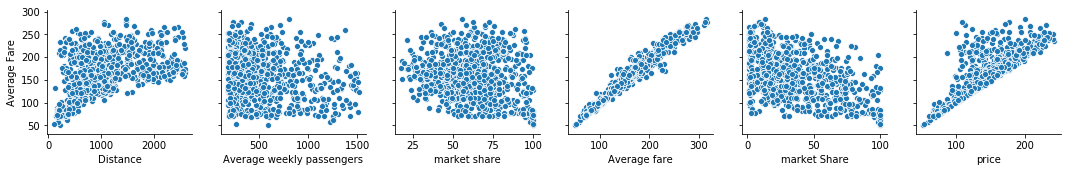

In [53]:
#Q: Create scatter Plot of Independent Variable vs Dependent Variable

import seaborn as sns

sns.pairplot(us_transport,x_vars=X.columns,y_vars=Y.columns)


In [62]:
#Q. Divide the data set into training and test data set and build a Multiple Linear Regression model.
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=50)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     Distance  Average weekly passengers  market share  Average fare  \
525       793                     356.84         76.05        137.66   
479       629                     412.17         67.06        182.94   
8        1073                     550.54         76.84        127.69   
974      1774                     229.89         26.71        169.59   
681      2027                     406.95         22.38        157.05   
575      1133                     589.56         78.22        135.84   
541       197                     919.67         93.74         77.31   
933       859                     684.56         83.80        136.10   
911      1262                     687.17         46.01        147.61   
422      1182                     615.00         59.91        273.84   
122       360                     198.04         93.90        237.95   
31        576                    1453.91         67.61        138.42   
124       314                     945.00         52.04         7

In [63]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
lm = reg.fit(X_train, y_train) 

r2 = reg.score(X_train,y_train)
print(r2)

0.9709370824064743


In [64]:
# Q. Print the coefficients & intercepts of the linear regression model 
print(reg.coef_)
print(reg.intercept_)


[[ 0.00259397 -0.00368457  0.08572879  0.7475803  -0.03544518  0.20407078]]
[5.19556278]


In [66]:
#Q. Print the accuracy of the overall model 
# Finding model performance using RMSE
from sklearn import metrics

y_pred = reg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



7.13623441774322
